In [1]:
import featureMatching as fmat
import cv2
import numpy as np
import math
import os
import matplotlib.pyplot as plt

In [2]:
img_path = '../../data/din/0_wrapped.png'
img1 = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (int(img1.shape[1]/2), int(img1.shape[0]/2)))

# img_path = '../../data/230411/4_wrapped.png'
img_path = '../../data/din/9_wrapped.png'
img2 = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (int(img2.shape[1]/2), int(img2.shape[0]/2)))

# argmax, anms
nm='argmax'
points1, points2 = fmat.msop(img1, img2, nm=nm)

hmp (204, 2)
RANSAC: (166, 2)


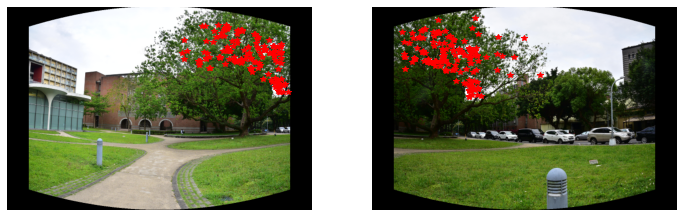

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img1)
for pt in points1:
    plt.plot(pt[1], pt[0], 'r*')
    
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img2)
for pt in points2:
    plt.plot(pt[1], pt[0], 'r*')

# plt.savefig('imgs_feature.png')
plt.show()

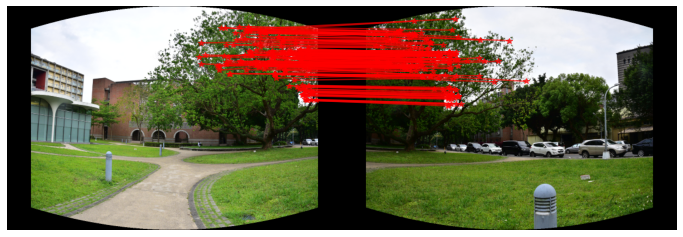

In [8]:
img_12 = cv2.hconcat([img1, img2])
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(img_12)
for i in range(len(points1)):
#     print(mp)
    x1 = points1[i, 1]
    x2 = points2[i, 1] + img1.shape[1]
    y1 = points1[i, 0]
    y2 = points2[i, 0]
    plt.plot([x1, x2], [y1, y2], 'r*-', alpha=0.6)
plt.savefig('feature_matching_ransac.png')
plt.show()

In [11]:
import featureDetection as fdet
import matplotlib.pyplot as plt
img_path = '../test/cat.jpg'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# while max(img.shape) >1000:
#     img = cv2.resize(img, (int(img.shape[0]/2), int(img.shape[1]/2)))
print(img.shape)
# argmax, anms
# rsp, ftx, fty = HarrisCorner(img, nm='argmax', n=100)
rsp, ftx, fty = fdet.multiscaleHarris(img, n=250, nm='argmax')


(3694, 2955, 3)
All takes 234.27205967903137s


0
255
<class 'numpy.ndarray'>
0
255


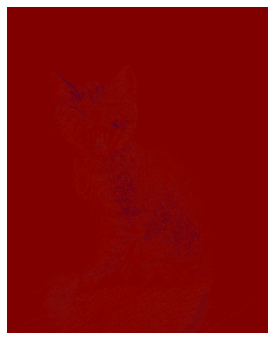

In [46]:
# rsp1 = np.uint8(fdet.normalize2(rsp)*250)+6
rsp1 = None
rsp1 = cv2.normalize(rsp, rsp1, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
print(np.min(rsp1))
print(np.max(rsp1))
rsp1 = cv2.applyColorMap(rsp1, cv2.COLORMAP_JET)
# rsp1 = cv2.applyColorMap(np.uint8(rsp), cv2.COLORMAP_JET)
print(type(rsp1))
print(np.min(rsp1))
print(np.max(rsp1))
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(rsp1, cmap=plt.cm.jet)
plt.savefig('multiHarris.png')
plt.show()